# Estructura RNN
- Objetivo: Conocer la notación de las RNN
- Las RNN con un tipo de red neuronal que puede trabajar con secuencias de datos al preservar el "estado" anterior
- Muchas RNN trabajan con embeddings en las entradas. Los embeddings son representaciones vectoriales aprendidas por la red, lo cual captura la relación de las palabras. 

- A diferencia de  las Feedforward neural networks, las RNN tienen memoria

![RNN](img/3.png)

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Reseñas de películas de IMDB

- Conjunto de datos de 25,000 críticas de películas de IMDB, etiquetadas por sentimiento (positivo / negativo).
- La función 'pad_sequences' recibe  padding = 'post'/'pre' para agregar '0'. Por defecto se toma el parámetro 'pre'

https://www.tensorflow.org/guide/keras/masking_and_padding

In [2]:
# numero de palabras
num_words = 4000

max_len = 100


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=max_len, padding = 'post')
x_test = pad_sequences(x_test, maxlen=max_len, padding = 'post')


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100)
(25000, 100)
(25000,)
(25000,)


In [3]:
epoch = 10
verbose = 1
batch = 30

## Cada palabra de la review esta identificada por un número

In [4]:
print('Reseña')
print(x_train[0])
print('Etiqueta')
print(y_train[0])

Reseña
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16    2  113  103   32   15   16    2   19
  178   32]
Etiqueta
1


## Palabras de reseña

In [5]:
wordDict = {y:x for x,y in imdb.get_word_index().items()}  
res = []
for index in x_train[0]:
    res.append(wordDict.get(index - 3))
print('Reseña: ',res,'Longitud reseña: ', len(res))

Reseña:  ['cry', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and', 'this', 'definitely', 'was', 'also', None, 'to', 'the', 'two', 'little', None, 'that', 'played', 'the', None, 'of', 'norman', 'and', 'paul', 'they', 'were', 'just', 'brilliant', 'children', 'are', 'often', 'left', 'out', 'of', 'the', None, 'list', 'i', 'think', 'because', 'the', 'stars', 'that', 'play', 'them', 'all', 'grown', 'up', 'are', 'such', 'a', 'big', None, 'for', 'the', 'whole', 'film', 'but', 'these', 'children', 'are', 'amazing', 'and', 'should', 'be', None, 'for', 'what', 'they', 'have', 'done', "don't", 'you', 'think', 'the', 'whole', 'story', 'was', 'so', 'lovely', 'because', 'it', 'was', 'true', 'and', 'was', None, 'life', 'after', 'all', 'that', 'was', None, 'with', 'us', 'all'] Longitud reseña:  100


## RNN simple con embedding
- Los embeddings son representaciones vectoriales de palabras o caracteres


In [6]:
model = Sequential()
model.add(Embedding(num_words, 128))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=batch, epochs=epoch, verbose = verbose,
                    validation_split = 0.3)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         512000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 545,025
Trainable params: 545,025
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 27s 2ms/sample - loss: 0.6472 - accuracy: 0.6013 - val_loss: 0.5717 - val_accuracy: 0.6985
Epoch 2/10
17500/17500 [==============================] - 26s 1ms/sample - loss: 0.5764 - accuracy: 0.7247 - val_loss: 0.5019 - val_accuracy: 0.7659
Epoch 3/10
17500/17500 [=========

In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 7s - loss: 0.7967 - accuracy: 0.7376

Test acccuracy: 0.73756


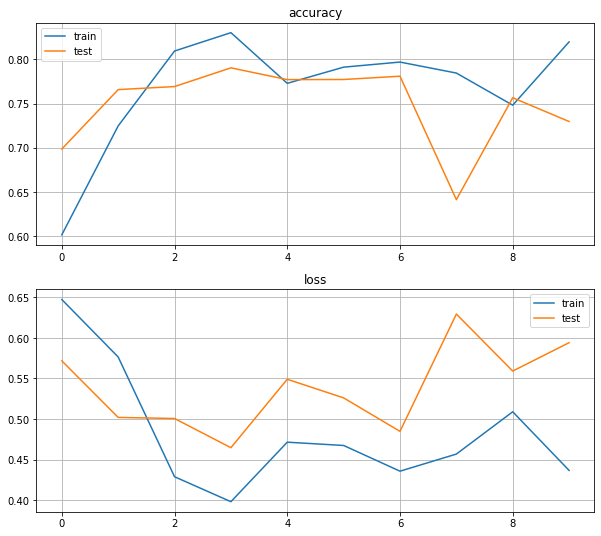

In [9]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 7s - loss: 0.7967 - accuracy: 0.7376

Test acccuracy: 0.73756


## LSTM



- En LSTM se toma en cuenta el estado $st$, el cual sirve para olvidar o recordar parámetros relevantes
- Las LSTM cuentan con más matrices, lo que les permite tener mejor memoria
![LSTM](img/2.png)




In [11]:
model = Sequential()
model.add(Embedding(num_words, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=batch, epochs=epoch, verbose = verbose,
                    validation_split = 0.3)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         512000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 643,713
Trainable params: 643,713
Non-trainable params: 0
_________________________________________________________________
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 11s 628us/sample - loss: 0.4699 - accuracy: 0.7717 - val_loss: 0.3904 - val_accuracy: 0.8281
Epoch 2/10
17500/17500 [==============================] - 9s 524us/sample - loss: 0.3360 - accuracy: 0.8634 - val_loss: 0.4058 - val_accuracy: 0.8316
Epoch 3/10
17500/17500 [====

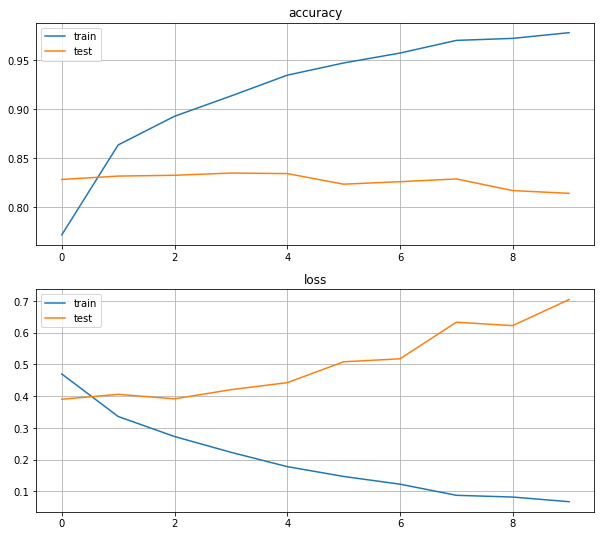

In [14]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

25000/1 - 3s - loss: 0.9179 - accuracy: 0.8161

Test acccuracy: 0.81608


- Experimentar con diferentes arquitecturas y número de neuronas
- Experimentar con otro dataset
- Experimentar con otros optimizadores y funciones de activación